Importing Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df = pd.read_csv('datasets/lego_sets.csv')
df.head()

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


In [4]:
themes = pd.read_csv('datasets/parent_themes.csv')
themes.head()

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False


In [5]:
#Merge the two data frames based on same column
merged_df = df.merge(themes, left_on='parent_theme', right_on='name')
merged_df.head()
merged_df.shape

(11986, 9)

In [6]:
merged_df.drop(columns='name_y', inplace=True)
merged_df.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,False


In [7]:
#to drop null values
merged_df[merged_df['set_num'].isnull()].shape
merged_df = merged_df.dropna(subset=['set_num'])
merged_df.shape


(11833, 8)

1)What percentage of all licensed sets ever released were star wars themed?     
  Save the answer as a variable *the_force* in the form of an integer

In [8]:
#Boolean indexing for the column is_licensed
licensed = merged_df[merged_df['is_licensed']==True]
licensed.head(5)

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True


In [9]:
#Boolean indexing for the column parent_theme which is equal to Star Wars
star_wars = licensed[licensed['parent_theme']=='Star Wars']
star_wars.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True


In [10]:
#get the shape of the dataframe of star_wars and including only the rows through indexing
star_wars.shape[0]

609

In [11]:
#get the shape of the dataframe of licensed and including only the rows through indexing
licensed.shape[0]

1179

In [12]:
#percentage of star_wars over licensed sets 
the_force = int(star_wars.shape[0]/licensed.shape[0]*100)
the_force

51

2)In which year was star wars not the most popular licensed theme(In terms of number of sets released that year)?       
Save the answer as a variable *new_era* in the form of an integer

In [13]:
licensed_sorted = licensed.sort_values('year')
licensed_sorted['count']=1
#licensed_sorted.head()
#grouping the values based on year and parent_theme
group_df = licensed_sorted.groupby(['year','parent_theme']).sum().reset_index()
max_df = group_df.sort_values('count', ascending=False).drop_duplicates('year')
max_df.sort_values('year', inplace=True)
max_df.head()

,year,parent_theme,set_num,name_x,num_parts,theme_name,id,is_licensed,count
0,1999,Star Wars,7161-17171-17140-17130-17128-17141-17121-17131...,Gungan SubMos Espa PodraceX-wing FighterSnowsp...,1384.0,Star Wars Episode 1Star Wars Episode 1Star War...,2054,13,13
2,2000,Star Wars,7134-13341-17159-17144-17124-17115-17104-14151...,A-wing FighterStar Wars #2 - Luke/Han/Boba Min...,2580.0,Star Wars Episode 4/5/6Star Wars Episode 4/5/6...,4108,26,26
4,2001,Star Wars,7166-17186-165028-165030-165034-18007-18008-17...,Imperial ShuttleWatto's JunkyardStar Wars Co-P...,2949.0,Star Wars Episode 4/5/6Star Wars Episode 1Star...,2212,14,14
6,2002,Star Wars,8011-165153-165145-165106-1K7204-1K7153-17163-...,Jango Fett™Jango Fett's Slave I (Set 7153) wit...,4735.0,Star WarsStar Wars Episode 2Star Wars Episode ...,4424,28,28
9,2003,Star Wars,K4487-1K4488-1K4482-1VP-10K4479-1K4480-14487-1...,Star Wars Miniatures Kit IStar Wars Miniatures...,6660.0,MiniMiniStar Wars Episode 2Star Wars OtherStar...,5056,32,32


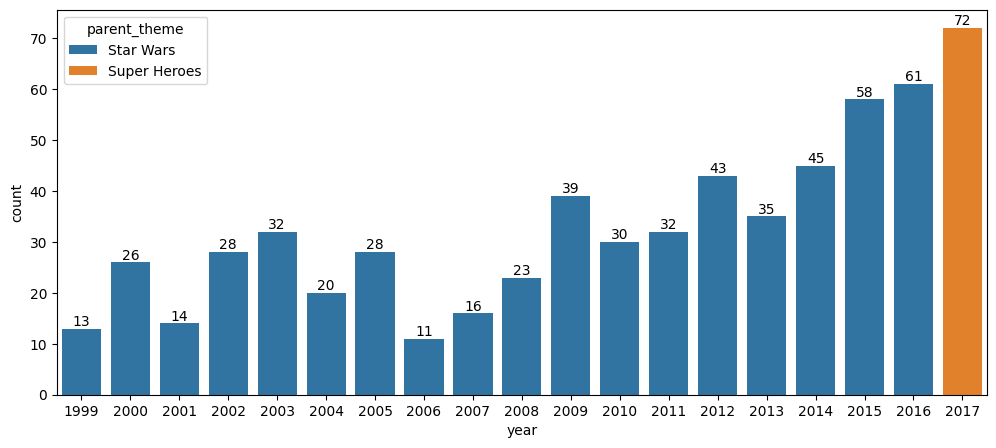

In [24]:

max_head = max_df.sort_values('count', ascending=False)
plt.figure(figsize=(12,5))
ax= sns.barplot(x='year', y='count', data=max_head, hue='parent_theme')
for bars in ax.containers:
    ax.bar_label(bars)

From the above graph we can conclude that the star wars was not the most popular licensed theme in the year 2017

In [26]:
new_era = max_df.max('columns'=='count')
new_era

year                                                         2017
parent_theme                                         Super Heroes
set_num         comcon001-17667-17668-17669-17669-27670-17670-...
name_x          Y-wing Attack Starfighter - UCSTIE Fighter and...
num_parts                                                 13123.0
theme_name      Super HeroesBatmanMarvelBatmanBatmanBatmanBatm...
id                                                          34704
is_licensed                                                    72
count                                                          72
dtype: object

3) Which year has max number of sets ?     
   Breakdown number of sets by year

In [27]:
clean_df = merged_df
clean_df

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,False
...,...,...,...,...,...,...,...,...
11981,8410-1,Swampfire,2010,22.0,Ben 10,Ben 10,270,True
11982,8411-1,ChromaStone,2010,21.0,Ben 10,Ben 10,270,True
11983,8517-1,Humungousaur,2010,14.0,Ben 10,Ben 10,270,True
11984,8518-1,Jet Ray,2010,NaN,Ben 10,Ben 10,270,True


In [28]:
clean_df['count'] =1
#clean_df.head()
sets_per_yr = clean_df.groupby(['year']).sum().reset_index()[['year','count']]
for indx,rows in sets_per_yr.iterrows():
    print(rows['year'],rows['count'])

1950 7
1953 4
1954 14
1955 28
1956 12
1957 21
1958 42
1959 4
1960 3
1961 17
1962 40
1963 18
1964 11
1965 10
1966 89
1967 21
1968 25
1969 69
1970 29
1971 45
1972 38
1973 68
1974 39
1975 31
1976 68
1977 92
1978 73
1979 82
1980 88
1981 79
1982 76
1983 57
1984 76
1985 139
1986 123
1987 209
1988 68
1989 114
1990 85
1991 106
1992 115
1993 111
1994 128
1995 128
1996 144
1997 194
1998 325
1999 300
2000 327
2001 339
2002 447
2003 415
2004 371
2005 330
2006 283
2007 319
2008 349
2009 403
2010 444
2011 502
2012 615
2013 593
2014 715
2015 670
2016 608
2017 438


As the years are growing , number of sets count also increased.

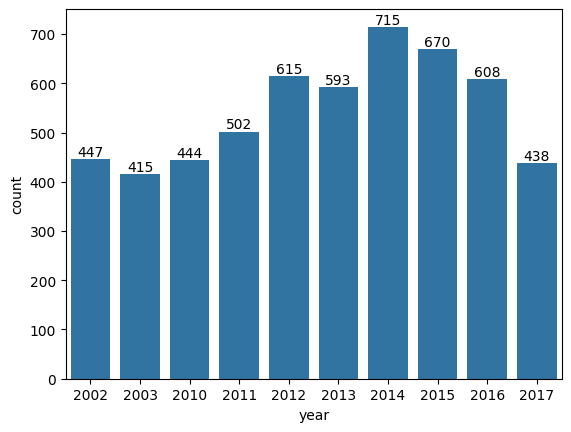

In [35]:
sets_sorted = sets_per_yr.sort_values('count', ascending=False).head(10)
ax = sns.barplot(x='year', y='count', data=sets_sorted)
for bars in ax.containers:
    ax.bar_label(bars)


From the above graph we can conclude that maximum number of sets are made in the year 2014 .